In [1]:
import pandas as pd
import numpy as np
import pickle
import re
import datetime as dt

from pybaseball import *


games_18 = pd.read_pickle('../pickles/2018_apps_ids.pkl')
games_17 = pd.read_pickle('../pickles/2017_apps_ids.pkl')
games_16 = pd.read_pickle('../pickles/2016_apps_ids.pkl')
games_15 = pd.read_pickle('../pickles/2015_apps_ids.pkl')


games_18['date'] = pd.to_datetime(games_18['date'])
games_17['date'] = pd.to_datetime(games_17['date'])
games_16['date'] = pd.to_datetime(games_16['date'])
games_15['date'] = pd.to_datetime(games_15['date'])


games_18 = games_18.sort_values(by=['key_mlbam', 'date'])
games_17 = games_17.sort_values(by=['key_mlbam', 'date'])
games_16 = games_16.sort_values(by=['key_mlbam', 'date'])
games_15 = games_15.sort_values(by=['key_mlbam', 'date'])

inj_18 = pd.read_pickle('../pickles/2018_inj_ids.pkl')
inj_17 = pd.read_pickle('../pickles/2017_inj_ids.pkl')
inj_16 = pd.read_pickle('../pickles/2016_inj_ids.pkl')
inj_15 = pd.read_pickle('../pickles/2015_inj_ids.pkl')

merge_18 = games_18.merge(inj_18, on='key_mlbam', how='left')
merge_17 = games_17.merge(inj_17, on='key_mlbam', how='left')
merge_16 = games_16.merge(inj_16, on='key_mlbam', how='left')
merge_15 = games_15.merge(inj_15, on='key_mlbam', how='left')

merge_18 = merge_18.sort_values(by=['key_mlbam', 'date'])
merge_17 = merge_17.sort_values(by=['key_mlbam', 'date'])
merge_16 = merge_16.sort_values(by=['key_mlbam', 'date'])
merge_15 = merge_15.sort_values(by=['key_mlbam', 'date'])

merge_18['days_preceeding'] = merge_18['startdate'] - merge_18['date']
merge_17['days_preceeding'] = merge_17['startdate'] - merge_17['date']
merge_16['days_preceeding'] = merge_16['startdate'] - merge_16['date']
merge_15['days_preceeding'] = merge_15['startdate'] - merge_15['date']

merge_18['days_rest'] = merge_18['date'] - merge_18['date'].shift()
merge_17['days_rest'] = merge_17['date'] - merge_17['date'].shift()
merge_16['days_rest'] = merge_16['date'] - merge_16['date'].shift()
merge_15['days_rest'] = merge_15['date'] - merge_15['date'].shift()

merge_18['injured?'] = 0
merge_17['injured?'] = 0
merge_16['injured?'] = 0
merge_15['injured?'] = 0

merge_18_inj = merge_18[merge_18['days_preceeding'].notnull()]
merge_17_inj = merge_17[merge_17['days_preceeding'].notnull()]
merge_16_inj = merge_16[merge_16['days_preceeding'].notnull()]
merge_15_inj = merge_15[merge_15['days_preceeding'].notnull()]

merge_18_noinj = merge_18[merge_18['days_preceeding'].isnull()]
merge_17_noinj = merge_17[merge_17['days_preceeding'].isnull()]
merge_16_noinj = merge_16[merge_16['days_preceeding'].isnull()]
merge_15_noinj = merge_15[merge_15['days_preceeding'].isnull()]

id_list_18 = merge_18_inj['key_mlbam'].unique().tolist()
id_list_17 = merge_17_inj['key_mlbam'].unique().tolist()
id_list_16 = merge_16_inj['key_mlbam'].unique().tolist()
id_list_15 = merge_15_inj['key_mlbam'].unique().tolist()

frames_18 = pd.DataFrame()
for id in id_list_18:
    frame = merge_18_inj[merge_18_inj['key_mlbam'] == id]
    try:
        inj_index = frame.index[frame['days_preceeding'] < dt.timedelta(0)][0]-1
    except:
        inj_index = frame.tail(1).index.item()
    frame.at[inj_index, 'injured?'] = 1
    frames_18 = frames_18.append(frame)
    frames_18 = frames_18.drop_duplicates(keep=False)
df_18 = frames_18.append(merge_18_noinj)
df_18 = df_18.sort_values(by=['key_mlbam', 'date'])

frames_17 = pd.DataFrame()
for id in id_list_17:
    frame = merge_17_inj[merge_17_inj['key_mlbam'] == id]
    try:
        inj_index = frame.index[frame['days_preceeding'] < dt.timedelta(0)][0]-1
    except:
        inj_index = frame.tail(1).index.item()
    frame.at[inj_index, 'injured?'] = 1
    frames_17 = frames_17.append(frame)
    frames_17 = frames_17.drop_duplicates(keep=False)
df_17 = frames_17.append(merge_17_noinj)
df_17 = df_17.sort_values(by=['key_mlbam', 'date'])


frames_16 = pd.DataFrame()
for id in id_list_16:
    frame = merge_16_inj[merge_16_inj['key_mlbam'] == id]
    try:
        inj_index = frame.index[frame['days_preceeding'] < dt.timedelta(0)][0]-1
    except:
        inj_index = frame.tail(1).index.item()
    frame.at[inj_index, 'injured?'] = 1
    frames_16 = frames_16.append(frame)
    frames_16 = frames_16.drop_duplicates(keep=False)
df_16 = frames_16.append(merge_16_noinj)
df_16 = df_16.sort_values(by=['key_mlbam', 'date'])


frames_15 = pd.DataFrame()
for id in id_list_15:
    frame = merge_15_inj[merge_15_inj['key_mlbam'] == id]
    try:
        inj_index = frame.index[frame['days_preceeding'] < dt.timedelta(0)][0]-1
    except:
        inj_index = frame.tail(1).index.item()
    frame.at[inj_index, 'injured?'] = 1
    frames_15 = frames_15.append(frame)
    frames_15 = frames_15.drop_duplicates(keep=False)
df_15 = frames_15.append(merge_15_noinj)
df_15 = df_15.sort_values(by=['key_mlbam', 'date'])



/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2587: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[index, col] = value


In [31]:
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

In [3]:
merge_18

name_x  age  #days     lev         tm  g  gs    w    l   sv  \
0         bartolocolon   45    368  MLB-AL      Texas  1   1  NaN  NaN  NaN   
1         bartolocolon   45    362  MLB-AL      Texas  1   0  NaN  NaN  NaN   
2         bartolocolon   45    360  MLB-AL      Texas  1   0  NaN  NaN  NaN   
3         bartolocolon   45    355  MLB-AL      Texas  1   1  NaN  NaN  NaN   
4         bartolocolon   45    349  MLB-AL      Texas  1   1  NaN  NaN  NaN   
5         bartolocolon   45    342  MLB-AL      Texas  1   1  1.0  NaN  NaN   
6         bartolocolon   45    336  MLB-AL      Texas  1   1  NaN  1.0  NaN   
7         bartolocolon   45    331  MLB-AL      Texas  1   1  NaN  NaN  NaN   
8         bartolocolon   45    324  MLB-AL      Texas  1   1  1.0  NaN  NaN   
9         bartolocolon   45    319  MLB-AL      Texas  1   1  NaN  1.0  NaN   
10        bartolocolon   45    314  MLB-AL      Texas  1   1  NaN  NaN  NaN   
11        bartolocolon   45    308  MLB-AL      Texas  1   1  NaN  1.0  NaN   
12        bartolocolon   45    303  MLB-AL      Texas  1   1  1.0  NaN  NaN   
13        bartolocolon   45    297  MLB-AL      Texas  1   1  NaN  1.0  NaN   
14        bartolocolon   45    291  MLB-AL      Texas  1   1  1.0  NaN  NaN   
15        bartolocolon   45    285  MLB-AL      Texas  1   1  NaN  1.0  NaN   
16        bartolocolon   45    279  MLB-AL      Texas  1   1  1.0  NaN  NaN   
17        bartolocolon   45    273  MLB-AL      Texas  1   1  NaN  1.0  NaN   
18        bartolocolon   45    268  MLB-AL      Texas  1   1  NaN  1.0  NaN   
19        bartolocolon   45    258  MLB-AL      Texas  1   1  NaN  1.0  NaN   
20        bartolocolon   45    253  MLB-AL      Texas  1   1  NaN  1.0  NaN   
21        bartolocolon   45    248  MLB-AL      Texas  1   1  NaN  1.0  NaN   
22        bartolocolon   45    241  MLB-AL      Texas  1   1  1.0  NaN  NaN   
23        bartolocolon   45    235  MLB-AL      Texas  1   1  1.0  NaN  NaN   
24        bartolocolon   45    228  MLB-AL      Texas  1   1  NaN  1.0  NaN   
25        bartolocolon   45    212  MLB-AL      Texas  1   1  NaN  1.0  NaN   
26        bartolocolon   45    198  MLB-AL      Texas  1   0  NaN  NaN  NaN   
27        bartolocolon   45    195  MLB-AL      Texas  1   0  NaN  NaN  NaN   
28         mattbelisle   38    368  MLB-AL  Cleveland  1   0  NaN  NaN  NaN   
29         mattbelisle   38    367  MLB-AL  Cleveland  1   0  NaN  NaN  NaN   
30         mattbelisle   38    358  MLB-AL  Cleveland  1   0  NaN  NaN  NaN   
31         mattbelisle   38    357  MLB-AL  Cleveland  1   0  NaN  NaN  NaN   
32         mattbelisle   38    352  MLB-AL  Cleveland  1   0  NaN  NaN  NaN   
33         mattbelisle   38    346  MLB-AL  Cleveland  1   0  NaN  NaN  NaN   
34         mattbelisle   38    342  MLB-AL  Cleveland  1   0  NaN  NaN  NaN   
35         mattbelisle   38    339  MLB-AL  Cleveland  1   0  NaN  NaN  NaN   
36         mattbelisle   38    296  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
37         mattbelisle   38    293  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
38         mattbelisle   38    292  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
39         mattbelisle   38    288  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
40         mattbelisle   38    287  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
41         mattbelisle   38    283  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
42         mattbelisle   38    280  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
43         mattbelisle   38    279  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
44         mattbelisle   38    273  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
45         mattbelisle   38    271  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
46         mattbelisle   38    269  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
47         mattbelisle   38    266  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
48         mattbelisle   38    265  MLB-AL  Minnesota  1   0  NaN  NaN  NaN   
49         mattbelisle   38    259  MLB-AL  Minnesota  1   0  NaN 

In [4]:
print(len(games_18))
df_18

21172


name_x   age  #days     lev         tm    g   gs    w    l  \
0         bartolocolon  45.0  368.0  MLB-AL      Texas  1.0  1.0  NaN  NaN   
1         bartolocolon  45.0  362.0  MLB-AL      Texas  1.0  0.0  NaN  NaN   
2         bartolocolon  45.0  360.0  MLB-AL      Texas  1.0  0.0  NaN  NaN   
3         bartolocolon  45.0  355.0  MLB-AL      Texas  1.0  1.0  NaN  NaN   
4         bartolocolon  45.0  349.0  MLB-AL      Texas  1.0  1.0  NaN  NaN   
5         bartolocolon  45.0  342.0  MLB-AL      Texas  1.0  1.0  1.0  NaN   
6         bartolocolon  45.0  336.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
7         bartolocolon  45.0  331.0  MLB-AL      Texas  1.0  1.0  NaN  NaN   
8         bartolocolon  45.0  324.0  MLB-AL      Texas  1.0  1.0  1.0  NaN   
9         bartolocolon  45.0  319.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
10        bartolocolon  45.0  314.0  MLB-AL      Texas  1.0  1.0  NaN  NaN   
11        bartolocolon  45.0  308.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
12        bartolocolon  45.0  303.0  MLB-AL      Texas  1.0  1.0  1.0  NaN   
13        bartolocolon  45.0  297.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
14        bartolocolon  45.0  291.0  MLB-AL      Texas  1.0  1.0  1.0  NaN   
15        bartolocolon  45.0  285.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
16        bartolocolon  45.0  279.0  MLB-AL      Texas  1.0  1.0  1.0  NaN   
17        bartolocolon  45.0  273.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
18        bartolocolon  45.0  268.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
19        bartolocolon  45.0  258.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
20        bartolocolon  45.0  253.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
21        bartolocolon  45.0  248.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
22        bartolocolon  45.0  241.0  MLB-AL      Texas  1.0  1.0  1.0  NaN   
23        bartolocolon  45.0  235.0  MLB-AL      Texas  1.0  1.0  1.0  NaN   
24        bartolocolon  45.0  228.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
25        bartolocolon  45.0  212.0  MLB-AL      Texas  1.0  1.0  NaN  1.0   
26        bartolocolon  45.0  198.0  MLB-AL      Texas  1.0  0.0  NaN  NaN   
27        bartolocolon  45.0  195.0  MLB-AL      Texas  1.0  0.0  NaN  NaN   
28         mattbelisle  38.0  368.0  MLB-AL  Cleveland  1.0  0.0  NaN  NaN   
29         mattbelisle  38.0  367.0  MLB-AL  Cleveland  1.0  0.0  NaN  NaN   
30         mattbelisle  38.0  358.0  MLB-AL  Cleveland  1.0  0.0  NaN  NaN   
31         mattbelisle  38.0  357.0  MLB-AL  Cleveland  1.0  0.0  NaN  NaN   
32         mattbelisle  38.0  352.0  MLB-AL  Cleveland  1.0  0.0  NaN  NaN   
33         mattbelisle  38.0  346.0  MLB-AL  Cleveland  1.0  0.0  NaN  NaN   
34         mattbelisle  38.0  342.0  MLB-AL  Cleveland  1.0  0.0  NaN  NaN   
35         mattbelisle  38.0  339.0  MLB-AL  Cleveland  1.0  0.0  NaN  NaN   
36         mattbelisle  38.0  296.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
37         mattbelisle  38.0  293.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
38         mattbelisle  38.0  292.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
39         mattbelisle  38.0  288.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
40         mattbelisle  38.0  287.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
41         mattbelisle  38.0  283.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
42         mattbelisle  38.0  280.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
43         mattbelisle  38.0  279.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
44         mattbelisle  38.0  273.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
45         mattbelisle  38.0  271.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
46         mattbelisle  38.0  269.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
47         mattbelisle  38.0  266.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
48         mattbelisle  38.0  265.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
49         mattbelisle  38.0  259.0  MLB-AL  Minnesota  1.0  0.0  NaN  NaN   
50         mattbelisle  38.0  256.0  M

In [5]:
print(len(games_17))
df_17

20498


name_x   age  #days     lev            tm    g   gs    w    l  \
0       bartolocolon  44.0  730.0  MLB-NL       Atlanta  1.0  1.0  NaN  NaN   
1       bartolocolon  44.0  724.0  MLB-NL       Atlanta  1.0  1.0  NaN  1.0   
2       bartolocolon  44.0  719.0  MLB-NL       Atlanta  1.0  1.0  1.0  NaN   
3       bartolocolon  44.0  714.0  MLB-NL       Atlanta  1.0  1.0  NaN  1.0   
4       bartolocolon  44.0  707.0  MLB-NL       Atlanta  1.0  1.0  NaN  NaN   
5       bartolocolon  44.0  702.0  MLB-NL       Atlanta  1.0  1.0  NaN  1.0   
6       bartolocolon  44.0  696.0  MLB-NL       Atlanta  1.0  1.0  NaN  1.0   
7       bartolocolon  44.0  690.0  MLB-NL       Atlanta  1.0  1.0  1.0  NaN   
8       bartolocolon  44.0  685.0  MLB-NL       Atlanta  1.0  1.0  NaN  NaN   
9       bartolocolon  44.0  680.0  MLB-NL       Atlanta  1.0  1.0  NaN  1.0   
10      bartolocolon  44.0  675.0  MLB-NL       Atlanta  1.0  1.0  NaN  1.0   
11      bartolocolon  44.0  669.0  MLB-NL       Atlanta  1.0  1.0  NaN  1.0   
12      bartolocolon  44.0  646.0  MLB-NL       Atlanta  1.0  1.0  NaN  1.0   
13      bartolocolon  44.0  626.0  MLB-AL     Minnesota  1.0  1.0  NaN  1.0   
14      bartolocolon  44.0  620.0  MLB-AL     Minnesota  1.0  1.0  NaN  NaN   
15      bartolocolon  44.0  614.0  MLB-AL     Minnesota  1.0  1.0  NaN  NaN   
16      bartolocolon  44.0  609.0  MLB-AL     Minnesota  1.0  1.0  1.0  NaN   
17      bartolocolon  44.0  604.0  MLB-AL     Minnesota  1.0  1.0  1.0  NaN   
18      bartolocolon  44.0  598.0  MLB-AL     Minnesota  1.0  1.0  NaN  1.0   
19      bartolocolon  44.0  593.0  MLB-AL     Minnesota  1.0  1.0  1.0  NaN   
20      bartolocolon  44.0  588.0  MLB-AL     Minnesota  1.0  1.0  1.0  NaN   
21      bartolocolon  44.0  582.0  MLB-AL     Minnesota  1.0  1.0  NaN  NaN   
22      bartolocolon  44.0  577.0  MLB-AL     Minnesota  1.0  1.0  NaN  1.0   
23      bartolocolon  44.0  572.0  MLB-AL     Minnesota  1.0  1.0  NaN  1.0   
24      bartolocolon  44.0  567.0  MLB-AL     Minnesota  1.0  1.0  NaN  1.0   
25      bartolocolon  44.0  562.0  MLB-AL     Minnesota  1.0  1.0  NaN  1.0   
26      bartolocolon  44.0  556.0  MLB-AL     Minnesota  1.0  1.0  NaN  NaN   
27      bartolocolon  44.0  551.0  MLB-AL     Minnesota  1.0  1.0  1.0  NaN   
28       jasongrilli  40.0  732.0  MLB-AL       Toronto  1.0  0.0  NaN  1.0   
29       jasongrilli  40.0  729.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
30       jasongrilli  40.0  727.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
31       jasongrilli  40.0  724.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
32       jasongrilli  40.0  721.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
33       jasongrilli  40.0  716.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
34       jasongrilli  40.0  715.0  MLB-AL       Toronto  1.0  0.0  NaN  1.0   
35       jasongrilli  40.0  711.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
36       jasongrilli  40.0  710.0  MLB-AL       Toronto  1.0  0.0  1.0  NaN   
37       jasongrilli  40.0  707.0  MLB-AL       Toronto  1.0  0.0  NaN  1.0   
38       jasongrilli  40.0  703.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
39       jasongrilli  40.0  699.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
40       jasongrilli  40.0  696.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
41       jasongrilli  40.0  694.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
42       jasongrilli  40.0  692.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
43       jasongrilli  40.0  690.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
44       jasongrilli  40.0  687.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
45       jasongrilli  40.0  686.0  MLB-AL       Toronto  1.0  0.0  NaN  1.0   
46       jasongrilli  40.0  681.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
47       jasongrilli  40.0  677.0  MLB-AL       Toronto  1.0  0.0  NaN  NaN   
48       jasongrilli  40.0  674.0  MLB-AL       Toronto  1.0  0.0  1.0  NaN   
49       jasongrilli  40.0  671.0  MLB-AL       Toronto  1.0  0.

In [6]:
print(len(games_16))
df_16

20148


name_x   age   #days     lev             tm    g   gs    w  \
0        bartolocolon  43.0  1097.0  MLB-NL       New York  1.0  0.0  NaN   
1        bartolocolon  43.0  1091.0  MLB-NL       New York  1.0  1.0  NaN   
2        bartolocolon  43.0  1085.0  MLB-NL       New York  1.0  1.0  1.0   
3        bartolocolon  43.0  1080.0  MLB-NL       New York  1.0  1.0  NaN   
4        bartolocolon  43.0  1074.0  MLB-NL       New York  1.0  1.0  NaN   
5        bartolocolon  43.0  1068.0  MLB-NL       New York  1.0  1.0  1.0   
6        bartolocolon  43.0  1063.0  MLB-NL       New York  1.0  1.0  1.0   
7        bartolocolon  43.0  1058.0  MLB-NL       New York  1.0  1.0  NaN   
8        bartolocolon  43.0  1052.0  MLB-NL       New York  1.0  1.0  NaN   
9        bartolocolon  43.0  1047.0  MLB-NL       New York  1.0  1.0  1.0   
10       bartolocolon  43.0  1041.0  MLB-NL       New York  1.0  1.0  NaN   
11       bartolocolon  43.0  1035.0  MLB-NL       New York  1.0  1.0  NaN   
12       bartolocolon  43.0  1030.0  MLB-NL       New York  1.0  1.0  1.0   
13       bartolocolon  43.0  1023.0  MLB-NL       New York  1.0  1.0  1.0   
14       bartolocolon  43.0  1018.0  MLB-NL       New York  1.0  1.0  NaN   
15       bartolocolon  43.0  1013.0  MLB-NL       New York  1.0  1.0  NaN   
16       bartolocolon  43.0  1007.0  MLB-NL       New York  1.0  1.0  1.0   
17       bartolocolon  43.0  1002.0  MLB-NL       New York  1.0  1.0  NaN   
18       bartolocolon  43.0   994.0  MLB-NL       New York  1.0  1.0  1.0   
19       bartolocolon  43.0   989.0  MLB-NL       New York  1.0  1.0  NaN   
20       bartolocolon  43.0   983.0  MLB-NL       New York  1.0  1.0  1.0   
21       bartolocolon  43.0   979.0  MLB-NL       New York  1.0  1.0  NaN   
22       bartolocolon  43.0   974.0  MLB-NL       New York  1.0  1.0  1.0   
23       bartolocolon  43.0   968.0  MLB-NL       New York  1.0  1.0  NaN   
24       bartolocolon  43.0   963.0  MLB-NL       New York  1.0  1.0  NaN   
25       bartolocolon  43.0   958.0  MLB-NL       New York  1.0  1.0  1.0   
26       bartolocolon  43.0   952.0  MLB-NL       New York  1.0  1.0  1.0   
27       bartolocolon  43.0   947.0  MLB-NL       New York  1.0  1.0  NaN   
28       bartolocolon  43.0   942.0  MLB-NL       New York  1.0  1.0  1.0   
29       bartolocolon  43.0   937.0  MLB-NL       New York  1.0  1.0  NaN   
30       bartolocolon  43.0   931.0  MLB-NL       New York  1.0  1.0  1.0   
31       bartolocolon  43.0   926.0  MLB-NL       New York  1.0  1.0  NaN   
32       bartolocolon  43.0   921.0  MLB-NL       New York  1.0  1.0  NaN   
33       bartolocolon  43.0   916.0  MLB-NL       New York  1.0  1.0  1.0   
34          joenathan  41.0   985.0  MLB-NL        Chicago  1.0  0.0  1.0   
35          joenathan  41.0   983.0  MLB-NL        Chicago  1.0  0.0  NaN   
36          joenathan  41.0   978.0  MLB-NL        Chicago  1.0  0.0  NaN   
37          joenathan  41.0   943.0  MLB-NL  San Francisco  1.0  0.0  NaN   
38          joenathan  41.0   940.0  MLB-NL  San Francisco  1.0  0.0  NaN   
39          joenathan  41.0   938.0  MLB-NL  San Francisco  1.0  0.0  1.0   
40          joenathan  41.0   933.0  MLB-NL  San Francisco  1.0  0.0  NaN   
41          joenathan  41.0   929.0  MLB-NL  San Francisco  1.0  0.0  NaN   
42          joenathan  41.0   924.0  MLB-NL  San Francisco  1.0  0.0  NaN   
43          joenathan  41.0   920.0  MLB-NL  San Francisco  1.0  0.0  NaN   
44        jasongrilli  39.0  1096.0  MLB-NL        Atlanta  1.0  0.0  NaN   
45        jasongrilli  39.0  1091.0  MLB-NL        Atlanta  1.0  0.0  NaN   
46        jasongrilli  39.0  1089.0  MLB-NL        Atlanta  1.0  0.0  NaN   
47        jasongrilli  39.0  1084.0  MLB-NL        Atlanta  1.0  0.0  NaN   
48        jasongrilli  39.0  1083.0  MLB-NL        Atlanta  1.0  0.0  1.0   
49        jasongrilli  39.0  1080.0  MLB-NL        Atlanta  1.0  0.0  NaN   
50        jasongrilli  39.0  1078.0  MLB-NL        Atlanta  1.0  0.0  NaN   
51        j

In [10]:
df_16 = df_16.set_index(np.arange(len(df_16)))
# df_16 = df_16.drop(index=20148)
df_16

name_x   age   #days     lev             tm    g   gs    w  \
0        bartolocolon  43.0  1097.0  MLB-NL       New York  1.0  0.0  NaN   
1        bartolocolon  43.0  1091.0  MLB-NL       New York  1.0  1.0  NaN   
2        bartolocolon  43.0  1085.0  MLB-NL       New York  1.0  1.0  1.0   
3        bartolocolon  43.0  1080.0  MLB-NL       New York  1.0  1.0  NaN   
4        bartolocolon  43.0  1074.0  MLB-NL       New York  1.0  1.0  NaN   
5        bartolocolon  43.0  1068.0  MLB-NL       New York  1.0  1.0  1.0   
6        bartolocolon  43.0  1063.0  MLB-NL       New York  1.0  1.0  1.0   
7        bartolocolon  43.0  1058.0  MLB-NL       New York  1.0  1.0  NaN   
8        bartolocolon  43.0  1052.0  MLB-NL       New York  1.0  1.0  NaN   
9        bartolocolon  43.0  1047.0  MLB-NL       New York  1.0  1.0  1.0   
10       bartolocolon  43.0  1041.0  MLB-NL       New York  1.0  1.0  NaN   
11       bartolocolon  43.0  1035.0  MLB-NL       New York  1.0  1.0  NaN   
12       bartolocolon  43.0  1030.0  MLB-NL       New York  1.0  1.0  1.0   
13       bartolocolon  43.0  1023.0  MLB-NL       New York  1.0  1.0  1.0   
14       bartolocolon  43.0  1018.0  MLB-NL       New York  1.0  1.0  NaN   
15       bartolocolon  43.0  1013.0  MLB-NL       New York  1.0  1.0  NaN   
16       bartolocolon  43.0  1007.0  MLB-NL       New York  1.0  1.0  1.0   
17       bartolocolon  43.0  1002.0  MLB-NL       New York  1.0  1.0  NaN   
18       bartolocolon  43.0   994.0  MLB-NL       New York  1.0  1.0  1.0   
19       bartolocolon  43.0   989.0  MLB-NL       New York  1.0  1.0  NaN   
20       bartolocolon  43.0   983.0  MLB-NL       New York  1.0  1.0  1.0   
21       bartolocolon  43.0   979.0  MLB-NL       New York  1.0  1.0  NaN   
22       bartolocolon  43.0   974.0  MLB-NL       New York  1.0  1.0  1.0   
23       bartolocolon  43.0   968.0  MLB-NL       New York  1.0  1.0  NaN   
24       bartolocolon  43.0   963.0  MLB-NL       New York  1.0  1.0  NaN   
25       bartolocolon  43.0   958.0  MLB-NL       New York  1.0  1.0  1.0   
26       bartolocolon  43.0   952.0  MLB-NL       New York  1.0  1.0  1.0   
27       bartolocolon  43.0   947.0  MLB-NL       New York  1.0  1.0  NaN   
28       bartolocolon  43.0   942.0  MLB-NL       New York  1.0  1.0  1.0   
29       bartolocolon  43.0   937.0  MLB-NL       New York  1.0  1.0  NaN   
30       bartolocolon  43.0   931.0  MLB-NL       New York  1.0  1.0  1.0   
31       bartolocolon  43.0   926.0  MLB-NL       New York  1.0  1.0  NaN   
32       bartolocolon  43.0   921.0  MLB-NL       New York  1.0  1.0  NaN   
33       bartolocolon  43.0   916.0  MLB-NL       New York  1.0  1.0  1.0   
34          joenathan  41.0   985.0  MLB-NL        Chicago  1.0  0.0  1.0   
35          joenathan  41.0   983.0  MLB-NL        Chicago  1.0  0.0  NaN   
36          joenathan  41.0   978.0  MLB-NL        Chicago  1.0  0.0  NaN   
37          joenathan  41.0   943.0  MLB-NL  San Francisco  1.0  0.0  NaN   
38          joenathan  41.0   940.0  MLB-NL  San Francisco  1.0  0.0  NaN   
39          joenathan  41.0   938.0  MLB-NL  San Francisco  1.0  0.0  1.0   
40          joenathan  41.0   933.0  MLB-NL  San Francisco  1.0  0.0  NaN   
41          joenathan  41.0   929.0  MLB-NL  San Francisco  1.0  0.0  NaN   
42          joenathan  41.0   924.0  MLB-NL  San Francisco  1.0  0.0  NaN   
43          joenathan  41.0   920.0  MLB-NL  San Francisco  1.0  0.0  NaN   
44        jasongrilli  39.0  1096.0  MLB-NL        Atlanta  1.0  0.0  NaN   
45        jasongrilli  39.0  1091.0  MLB-NL        Atlanta  1.0  0.0  NaN   
46        jasongrilli  39.0  1089.0  MLB-NL        Atlanta  1.0  0.0  NaN   
47        jasongrilli  39.0  1084.0  MLB-NL        Atlanta  1.0  0.0  NaN   
48        jasongrilli  39.0  1083.0  MLB-NL        Atlanta  1.0  0.0  1.0   
49        jasongrilli  39.0  1080.0  MLB-NL        Atlanta  1.0  0.0  NaN   
50        jasongrilli  39.0  1078.0  MLB-NL        Atlanta  1.0  0.0  NaN   
51        j

In [11]:
print(len(games_15))
df_15 = df_15.set_index(np.arange(len(df_15)))
df_15

19945


name_x   age   #days     lev            tm    g   gs    w    l  \
0        bartolocolon  42.0  1460.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
1        bartolocolon  42.0  1454.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
2        bartolocolon  42.0  1449.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
3        bartolocolon  42.0  1443.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
4        bartolocolon  42.0  1437.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
5        bartolocolon  42.0  1431.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
6        bartolocolon  42.0  1426.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
7        bartolocolon  42.0  1421.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
8        bartolocolon  42.0  1416.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
9        bartolocolon  42.0  1411.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
10       bartolocolon  42.0  1405.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
11       bartolocolon  42.0  1399.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
12       bartolocolon  42.0  1393.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
13       bartolocolon  42.0  1387.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
14       bartolocolon  42.0  1381.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
15       bartolocolon  42.0  1374.0  MLB-NL      New York  1.0  1.0  NaN  NaN   
16       bartolocolon  42.0  1368.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
17       bartolocolon  42.0  1357.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
18       bartolocolon  42.0  1352.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
19       bartolocolon  42.0  1346.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
20       bartolocolon  42.0  1341.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
21       bartolocolon  42.0  1335.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
22       bartolocolon  42.0  1330.0  MLB-NL      New York  1.0  1.0  NaN  NaN   
23       bartolocolon  42.0  1323.0  MLB-NL      New York  1.0  1.0  NaN  NaN   
24       bartolocolon  42.0  1318.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
25       bartolocolon  42.0  1315.0  MLB-NL      New York  1.0  0.0  NaN  NaN   
26       bartolocolon  42.0  1313.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
27       bartolocolon  42.0  1308.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
28       bartolocolon  42.0  1303.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
29       bartolocolon  42.0  1297.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
30       bartolocolon  42.0  1290.0  MLB-NL      New York  1.0  1.0  NaN  NaN   
31       bartolocolon  42.0  1284.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
32       bartolocolon  42.0  1279.0  MLB-NL      New York  1.0  0.0  NaN  NaN   
33      latroyhawkins  42.0  1459.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
34      latroyhawkins  42.0  1458.0  MLB-NL      Colorado  1.0  0.0  1.0  NaN   
35      latroyhawkins  42.0  1454.0  MLB-NL      Colorado  1.0  0.0  NaN  1.0   
36      latroyhawkins  42.0  1452.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
37      latroyhawkins  42.0  1449.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
38      latroyhawkins  42.0  1446.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
39      latroyhawkins  42.0  1445.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
40      latroyhawkins  42.0  1394.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
41      latroyhawkins  42.0  1392.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
42      latroyhawkins  42.0  1390.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
43      latroyhawkins  42.0  1387.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
44      latroyhawkins  42.0  1386.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
45      latroyhawkins  42.0  1382.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
46      latroyhawkins  42.0  1381.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
47      latroyhawkins  42.0  1377.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
48      latroyhawkins  42.0  1375.0  MLB-NL   

In [12]:
df_15 = df_15.drop(index=19945)
df_15

name_x   age   #days     lev            tm    g   gs    w    l  \
0        bartolocolon  42.0  1460.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
1        bartolocolon  42.0  1454.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
2        bartolocolon  42.0  1449.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
3        bartolocolon  42.0  1443.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
4        bartolocolon  42.0  1437.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
5        bartolocolon  42.0  1431.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
6        bartolocolon  42.0  1426.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
7        bartolocolon  42.0  1421.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
8        bartolocolon  42.0  1416.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
9        bartolocolon  42.0  1411.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
10       bartolocolon  42.0  1405.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
11       bartolocolon  42.0  1399.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
12       bartolocolon  42.0  1393.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
13       bartolocolon  42.0  1387.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
14       bartolocolon  42.0  1381.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
15       bartolocolon  42.0  1374.0  MLB-NL      New York  1.0  1.0  NaN  NaN   
16       bartolocolon  42.0  1368.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
17       bartolocolon  42.0  1357.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
18       bartolocolon  42.0  1352.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
19       bartolocolon  42.0  1346.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
20       bartolocolon  42.0  1341.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
21       bartolocolon  42.0  1335.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
22       bartolocolon  42.0  1330.0  MLB-NL      New York  1.0  1.0  NaN  NaN   
23       bartolocolon  42.0  1323.0  MLB-NL      New York  1.0  1.0  NaN  NaN   
24       bartolocolon  42.0  1318.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
25       bartolocolon  42.0  1315.0  MLB-NL      New York  1.0  0.0  NaN  NaN   
26       bartolocolon  42.0  1313.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
27       bartolocolon  42.0  1308.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
28       bartolocolon  42.0  1303.0  MLB-NL      New York  1.0  1.0  1.0  NaN   
29       bartolocolon  42.0  1297.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
30       bartolocolon  42.0  1290.0  MLB-NL      New York  1.0  1.0  NaN  NaN   
31       bartolocolon  42.0  1284.0  MLB-NL      New York  1.0  1.0  NaN  1.0   
32       bartolocolon  42.0  1279.0  MLB-NL      New York  1.0  0.0  NaN  NaN   
33      latroyhawkins  42.0  1459.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
34      latroyhawkins  42.0  1458.0  MLB-NL      Colorado  1.0  0.0  1.0  NaN   
35      latroyhawkins  42.0  1454.0  MLB-NL      Colorado  1.0  0.0  NaN  1.0   
36      latroyhawkins  42.0  1452.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
37      latroyhawkins  42.0  1449.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
38      latroyhawkins  42.0  1446.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
39      latroyhawkins  42.0  1445.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
40      latroyhawkins  42.0  1394.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
41      latroyhawkins  42.0  1392.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
42      latroyhawkins  42.0  1390.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
43      latroyhawkins  42.0  1387.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
44      latroyhawkins  42.0  1386.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
45      latroyhawkins  42.0  1382.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
46      latroyhawkins  42.0  1381.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
47      latroyhawkins  42.0  1377.0  MLB-NL      Colorado  1.0  0.0  NaN  NaN   
48      latroyhawkins  42.0  1375.0  MLB-NL   

In [13]:
big = pd.concat([df_18, df_17, df_16, df_15])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [14]:
big['injured?'].sum()

876.0

In [15]:
len(big)

81763

In [33]:
876/81763

0.010713892592003718

In [70]:
big = pd.read_pickle('../pickles/labeled_games_agg.pkl')

In [71]:
big = big.sort_values(by=['key_mlbam', 'date'])
# big.to_pickle('../pickles/labeled_games_agg.pkl')

In [19]:
# df_18.to_pickle('../pickles/2018_games_labeled.pkl')
# df_17.to_pickle('../pickles/2017_games_labeled.pkl')
# df_16.to_pickle('../pickles/2016_games_labeled.pkl')
# df_15.to_pickle('../pickles/2015_games_labeled.pkl')

In [76]:
big_noinj = big[big['days_preceeding'] == 0]
big_noinj

#days   2b   3b    ab   age  appearance_yr  babip   bb    bf   cs  \
165    1427.0  2.0  0.0  21.0  38.0              1  0.529  1.0  22.0  0.0   
166    1421.0  1.0  0.0  13.0  38.0              2  0.500  0.0  13.0  0.0   
167    1322.0  0.0  0.0  29.0  38.0              1  0.375  0.0  29.0  0.0   
168    1317.0  0.0  0.0  23.0  38.0              2  0.278  2.0  25.0  1.0   
169    1311.0  3.0  0.0  18.0  38.0              3  0.429  3.0  22.0  0.0   
170    1306.0  2.0  0.0  21.0  38.0              4  0.375  0.0  21.0  0.0   
171    1300.0  0.0  0.0  12.0  38.0              5  0.333  4.0  16.0  0.0   
172    1292.0  2.0  2.0  24.0  38.0              6  0.222  4.0  29.0  0.0   
173    1286.0  2.0  0.0  13.0  38.0              7  0.700  1.0  14.0  0.0   
174    1279.0  1.0  0.0   4.0  38.0              8  0.333  1.0   5.0  0.0   
176     985.0  0.0  1.0   4.0  41.0              1  1.000  1.0   5.0  0.0   
177     983.0  0.0  0.0   3.0  41.0              2  0.000  0.0   3.0  0.0   
178     978.0  1.0  0.0   1.0  41.0              3  1.000  1.0   2.0  0.0   
179     943.0  0.0  0.0   3.0  41.0              4  0.000  0.0   3.0  0.0   
180     940.0  1.0  0.0   2.0  41.0              5  1.000  0.0   2.0  0.0   
181     938.0  0.0  0.0   4.0  41.0              6  0.333  0.0   4.0  0.0   
182     933.0  0.0  0.0   2.0  41.0              7  0.000  2.0   4.0  0.0   
183     929.0  0.0  0.0   1.0  41.0              8  0.000  0.0   1.0  0.0   
184     924.0  0.0  0.0   3.0  41.0              9  0.000  0.0   3.0  0.0   
185     920.0  0.0  0.0   1.0  41.0             10    NaN  0.0   1.0  0.0   
186    1456.0  1.0  0.0  23.0  36.0              1  0.267  2.0  25.0  0.0   
187    1451.0  2.0  0.0  18.0  36.0              2  0.500  3.0  23.0  1.0   
188    1445.0  2.0  0.0  22.0  36.0              3  0.571  0.0  23.0  0.0   
189    1439.0  3.0  0.0  27.0  36.0              4  0.292  2.0  30.0  0.0   
190    1434.0  1.0  0.0  22.0  36.0              5  0.235  2.0  25.0  0.0   
191    1427.0  1.0  0.0  26.0  36.0              6  0.304  1.0  27.0  1.0   
192    1421.0  0.0  0.0  16.0  36.0              7  0.500  2.0  18.0  0.0   
193    1416.0  1.0  0.0  14.0  36.0              8  0.267  0.0  16.0  0.0   
194    1411.0  1.0  0.0  26.0  36.0              9  0.429  2.0  29.0  1.0   
215    1345.0  1.0  0.0  23.0  38.0             21  0.474  2.0  27.0  0.0   
221    1293.0  0.0  0.0   5.0  37.0              1  0.250  1.0   6.0  0.0   
222    1287.0  2.0  0.0  12.0  37.0              2  0.455  1.0  13.0  0.0   
223    1283.0  0.0  0.0  14.0  37.0              3  0.200  4.0  18.0  0.0   
295    1096.0  0.0  0.0   4.0  39.0              1  0.500  1.0   6.0  0.0   
296    1091.0  0.0  0.0   2.0  39.0              2  0.000  3.0   5.0  0.0   
297    1089.0  0.0  0.0   3.0  39.0              3  0.000  0.0   3.0  0.0   
298    1084.0  0.0  0.0   4.0  39.0              4  1.000  1.0   5.0  0.0   
299    1083.0  0.0  0.0   5.0  39.0              5  0.500  0.0   5.0  0.0   
300    1080.0  1.0  0.0   3.0  39.0              6  1.000  2.0   5.0  0.0   
301    1078.0  0.0  0.0   3.0  39.0              7  0.333  0.0   3.0  0.0   
302    1076.0  0.0  0.0   4.0  39.0              8  0.333  0.0   4.0  0.0   
303    1073.0  0.0  0.0   4.0  39.0              9  0.000  1.0   5.0  0.0   
304    1069.0  0.0  0.0   3.0  39.0             10  0.000  1.0   4.0  0.0   
305    1063.0  0.0  0.0   5.0  39.0             11  0.500  0.0   5.0  0.0   
306    1062.0  0.0  0.0   3.0  39.0             12    NaN  0.0   3.0  0.0   
307    1058.0  0.0  1.0   2.0  39.0             13  1.000  0.0   3.0  0.0   
308    1056.0  0.0  0.0   1.0  39.0             14  0.000  0.0   1.0  0.0   
309    1055.0  0.0  0.0   1.0  39.0             15    NaN  0.0   1.0  0.0   
310    1053.0  0.0  1.0   3.0  39.0             16  0.333  0.0   3.0  0.0   
311    1051.0  0.0  0.0   4.0  39.0             17  0.000  1.0   5.0  0.0   
312    1049.0  0.0  0.0   4.0  39.0             18  0.000  0.0   4.0  0.0   
313 

In [78]:
big_inj = big[big['days_preceeding'] != 0]

In [77]:
big_noinj.groupby(by='key_mlbam').mean().describe()

#days           2b           3b           ab          age  \
count  1196.000000  1196.000000  1196.000000  1196.000000  1196.000000   
mean    813.795879     0.495465     0.049309     8.721545    27.376719   
std     386.504446     0.490516     0.092242     6.813568     3.570600   
min     191.000000     0.000000     0.000000     1.000000    19.217391   
25%     487.777299     0.146725     0.000000     3.637032    25.000000   
50%     828.569444     0.283702     0.013955     5.000000    26.979150   
75%    1113.467330     0.822051     0.066667    13.405263    29.434586   
max    1456.500000     4.000000     1.000000    25.484375    41.000000   

       appearance_yr        babip           bb           bf           cs  \
count    1196.000000  1194.000000  1196.000000  1196.000000  1196.000000   
mean       13.222725     0.291481     0.891487     9.843212     0.041317   
std        10.851994     0.102477     0.759408     7.541860     0.074616   
min         1.000000     0.000000     0.000000     1.000000     0.000000   
25%         3.500000     0.250538     0.350589     4.089545     0.000000   
50%        10.567568     0.287610     0.600000     5.750000     0.009804   
75%        18.914062     0.325681     1.344984    15.104167     0.055556   
max        41.000000     1.000000     7.000000    27.468750     1.000000   

             days  days_preceeding    days_rest           er          era  \
count   10.000000           1196.0  1196.000000  1196.000000  1196.000000   
mean    66.300000              0.0    39.107163     1.269904          inf   
std     41.400617              0.0    51.991139     1.104977          NaN   
min     23.000000              0.0     2.000000     0.000000     0.000000   
25%     35.500000              0.0     9.714738     0.403101     4.573373   
50%     56.500000              0.0    16.022222     0.836667     7.875000   
75%     83.500000              0.0    38.759740     2.080833          inf   
max    152.000000              0.0   182.000000     7.000000          inf   

                 g        gb/fb          gdp           gs            h  \
count  1196.000000  1195.000000  1196.000000  1196.000000  1196.000000   
mean      1.000755     0.435591     0.198774     0.252517     2.395954   
std       0.010475     0.130283     0.227320     0.380593     1.914728   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.370417     0.038247     0.000000     0.912938   
50%       1.000000     0.439286     0.106222     0.000000     1.494048   
75%       1.000000     0.502658     0.315789     0.500000     3.931723   
max       1.333333     1.000000     1.500000     1.000000    10.000000   

               hbp           hr          ibb     injured?           ip  \
count  1196.000000  1196.000000  1196.000000  1196.000000  1196.000000   
mean      0.103555     0.352888     0.048092     0.002757     2.098590   
std       0.152938     0.364920     0.083246     0.050379     1.782670   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.090909     0.000000     0.000000     0.849482   
50%       0.048696     0.200000     0.027588     0.000000     1.099537   
75%       0.145608     0.571429     0.064516     0.000000     3.200000   
max       1.000000     3.000000     1.000000     1.000000     7.250000   

       key_fangraphs_x  key_fangraphs_y      l           ld  \
count      1196.000000        10.000000  827.0  1195.000000   
mean      10590.822742      8613.200000    1.0     0.260239   
std        4804.807172      4183.722872    0.0     0.092482   
min          18.000000       512.000000    1.0     0.000000   
25%        6813.500000      6003.250000    1.0     0.223836   
50%       11358.000000      9125.500000    1.0     0.255714   
75%       14508.500000     11530.750000    1.0     0.290000   
max       19990.000000     13685.000000    1.0     1.000000   

       mlb_played_first_x  mlb_played_first_y  mlb_played_last_x 

In [79]:
big_inj.groupby(by='key_mlbam').mean().describe()

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


#days          2b          3b          ab         age  \
count   617.000000  617.000000  617.000000  617.000000  617.000000   
mean    776.869882    0.561769    0.062625   10.582014   28.404977   
std     364.690228    0.452683    0.116532    7.762305    3.866988   
min     194.333333    0.000000    0.000000    1.000000   20.000000   
25%     483.095238    0.169492    0.000000    3.659091   25.357143   
50%     706.505155    0.363636    0.032609    6.000000   28.000000   
75%    1024.833333    0.965517    0.086957   19.266667   31.000000   
max    1460.000000    2.000000    2.000000   25.241379   43.414634   

       appearance_yr       babip          bb          bf          cs  \
count     617.000000  616.000000  617.000000  617.000000  617.000000   
mean       14.325985    0.293622    0.993135   11.849571    0.056157   
std         8.482884    0.071136    0.721116    8.562119    0.076612   
min         1.000000    0.000000    0.000000    1.000000    0.000000   
25%         7.500000    0.260725    0.376344    4.121739    0.000000   
50%        13.000000    0.290777    0.684211    6.906250    0.028571   
75%        20.500000    0.322068    1.589744   21.538462    0.086957   
max        35.500000    0.857000    3.833333   26.880000    1.000000   

             days  days_preceeding   days_rest          er         era  \
count  617.000000       617.000000  617.000000  617.000000  617.000000   
mean    54.423109        -3.612776   20.952125    1.410715         inf   
std     37.995606        56.286898   26.274118    1.091335         NaN   
min      5.000000      -177.666667    5.014925    0.000000    0.000000   
25%     27.000000       -35.611111    8.682243    0.433962    4.828031   
50%     44.000000         4.174312   13.961538    1.000000    6.887755   
75%     71.235294        35.056604   21.714286    2.375000         NaN   
max    187.000000       289.154472  182.000000    5.000000         inf   

                g       gb/fb         gdp          gs           h         hbp  \
count  617.000000  616.000000  617.000000  617.000000  617.000000  617.000000   
mean     1.000447    0.443972    0.245789    0.387288    2.820507    0.123392   
std      0.003595    0.097691    0.240530    0.445218    2.103476    0.145586   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    0.386823    0.065789    0.000000    0.900000    0.025000   
50%      1.000000    0.444881    0.153846    0.016393    1.724138    0.075472   
75%      1.000000    0.495501    0.395833    0.950000    4.979381    0.171429   
max      1.071429    1.000000    2.000000    1.000000    8.000000    1.250000   

               hr         ibb    injured?          ip  key_fangraphs_x  \
count  617.000000  617.000000  617.000000  617.000000       617.000000   
mean     0.378181    0.056221    0.070130    2.604897      9464.842788   
std      0.348212    0.071998    0.136213    2.027049      4747.363575   
min      0.000000    0.000000    0.000000    0.100000        18.000000   
25%      0.101266    0.000000    0.020619    0.858333      5420.000000   
50%      0.230769    0.038462    0.035714    1.371875      9975.000000   
75%      0.625000    0.076923    0.062500    4.794872     13273.000000   
max      2.333333    0.666667    1.000000    6.958621     19374.000000   

       key_fangraphs_y      l          ld  mlb_played_first_x  \
count       617.000000  528.0  616.000000          617.000000   
mean       9464.842788    1.0    0.261402         2012.053485   
std        4747.363575    0.0    0.059245            4.196712   
min          18.000000    1.0    0.000000         1995.000000   
25%        5420.000000    1.0    0.230580         2010.000000   
50%        9975.000000    1.0    0.260000         2013.000000   
75%       13273.000000    1.0    0.287061         2015.000000   
max       19374.000000    1.0    0.670000         2018.000000   

       mlb_played_first_y  mlb_played_last_x  mlb_played_last_y         pit  \
coun

In [80]:
avg_noinj = big_noinj.groupby(by='key_mlbam').mean()
avg_inj = big_inj.groupby(by='key_mlbam').mean()
avg_noinj
avg_inj

#days        2b        3b         ab        age  \
key_mlbam                                                          
112526.0    856.081301  1.317073  0.178862  22.032520  43.414634   
115629.0   1363.071429  0.095238  0.047619   3.666667  42.000000   
150274.0   1460.000000  0.000000  0.000000   1.000000  40.000000   
150359.0   1382.040000  0.920000  0.200000  24.400000  38.000000   
218596.0   1377.583333  0.666667  0.083333  19.833333  39.000000   
234194.0   1443.363636  0.272727  0.000000   2.636364  37.000000   
276351.0   1407.472222  0.305556  0.000000   3.583333  38.000000   
276520.0    691.785714  1.928571  0.071429  21.000000  40.000000   
276542.0    825.796117  0.126214  0.019417   3.543689  38.504854   
279571.0    904.859813  0.233645  0.018692   4.205607  36.299065   
282332.0    828.556522  0.843478  0.086957  21.843478  35.486957   
285064.0   1006.375000  0.791667  0.250000  13.125000  38.000000   
346793.0   1382.307692  0.115385  0.000000   2.826923  36.000000   
346847.0   1359.056604  0.113208  0.000000   3.264151  38.000000   
400089.0   1349.833333  0.500000  0.000000   4.000000  35.000000   
407793.0    819.850000  0.916667  0.066667  22.066667  37.516667   
407819.0   1011.166667  0.277778  0.000000   3.888889  39.000000   
407822.0    710.812500  0.669643  0.053571  11.607143  35.821429   
407890.0   1028.263158  0.842105  0.105263  23.000000  36.000000   
407908.0   1362.454545  0.121212  0.000000   3.424242  39.000000   
408241.0   1136.100000  1.100000  0.280000  17.820000  34.620000   
421685.0   1373.758621  1.068966  0.379310  23.482759  37.000000   
425426.0   1023.815789  0.315789  0.026316   5.526316  36.000000   
425492.0    471.364407  0.144068  0.000000   3.466102  36.491525   
425532.0   1359.090909  0.818182  0.000000  15.393939  33.000000   
425626.0   1239.894737  0.421053  0.026316   6.789474  36.421053   
425786.0   1426.739130  0.217391  0.000000   3.478261  39.000000   
425794.0    711.179487  1.128205  0.102564  19.256410  34.846154   
425835.0   1050.000000  0.000000  0.000000   3.000000  35.000000   
425844.0   1016.692308  1.269231  0.192308  23.653846  32.000000   
425856.0   1102.142857  0.228571  0.000000   4.628571  32.800000   
429719.0    997.809524  0.904762  0.190476  15.476190  32.000000   
429722.0    895.571429  1.228571  0.028571  22.428571  33.285714   
429783.0   1389.863636  0.250000  0.045455   3.659091  40.000000   
430580.0   1044.000000  1.000000  0.066667  17.000000  35.000000   
430589.0   1141.357724  0.162602  0.032520   3.195122  36.666667   
430599.0    640.180000  0.180000  0.040000   3.580000  36.000000   
430630.0   1407.937500  0.218750  0.000000   3.250000  37.000000   
430641.0    510.094340  0.283019  0.075472   4.792453  35.396226   
430912.0   1135.117647  1.029412  0.176471  17.264706  30.617647   
430935.0    623.208333  1.166667  0.083333  22.833333  33.000000   
431148.0   1022.961538  1.115385  0.076923  20.230769  32.000000   
431162.0   1391.500000  0.388889  0.111111   4.944444  33.000000   
432934.0    998.970588  0.411765  0.058824  10.500000  37.000000   
433586.0    318.192308  0.230769  0.000000   4.076923  37.000000   
433587.0    624.871429  1.157143  0.057143  21.657143  31.057143   
434378.0   1332.750000  1.000000  0.100000  24.650000  32.000000   
434442.0    678.937500  0.375000  0.000000   2.812500  34.000000   
434538.0    478.953846  0.692308  0.123077  13.538462  33.415385   
434671.0    762.794872  0.987179  0.076923  19.794872  32.679487   
434718.0    983.266667  0.233333  0.000000   3.533333  32.133333   
435043.0    585.185185  0.074074  0.000000   2.444444  34.000000   
435045.0   1423.307692  0.307692  0.076923   4.769231  31.000000   
435221.0    686.541667  0.854167  0.062500  18.541667  32.937500   
435400.0   1044.671756  0.206107  0.022901   3.259542  33.916031   
444436.0   1063.277778  0.111111  0.000000   4.055556  30.000000   
444468.0   1010.500000  0.092593  0.000000   3.462963  28.000000   
44485

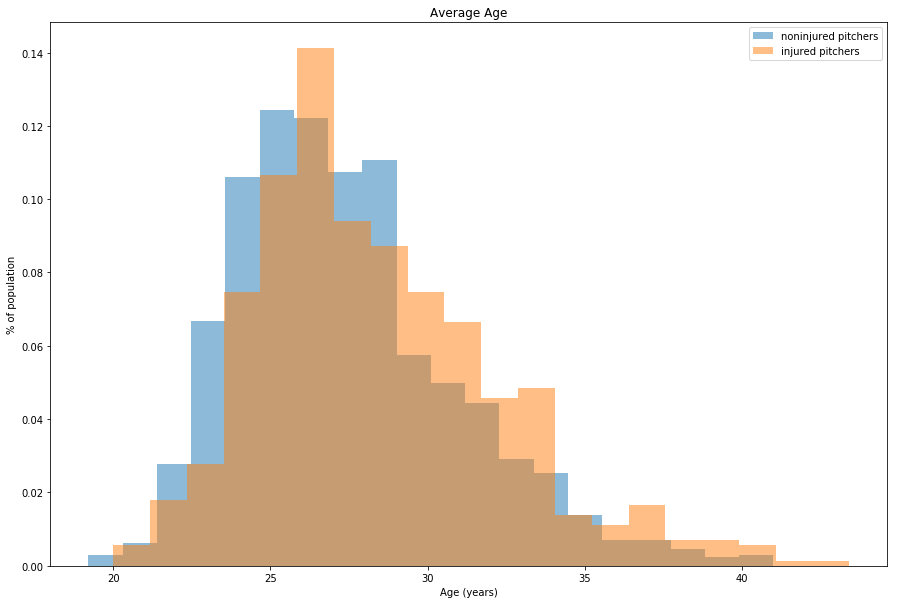

In [90]:
fig, ax = plt.subplots(figsize = (15,10))

plt.hist(avg_noinj['age'], bins=20, alpha=.5, density=True)
plt.hist(avg_inj['age'], bins=20, alpha=.5, density=True)
ax.legend(['noninjured pitchers', 'injured pitchers'])
plt.title('Average Age')
plt.xlabel('Age (years)')
plt.ylabel('% of population')
plt.show()

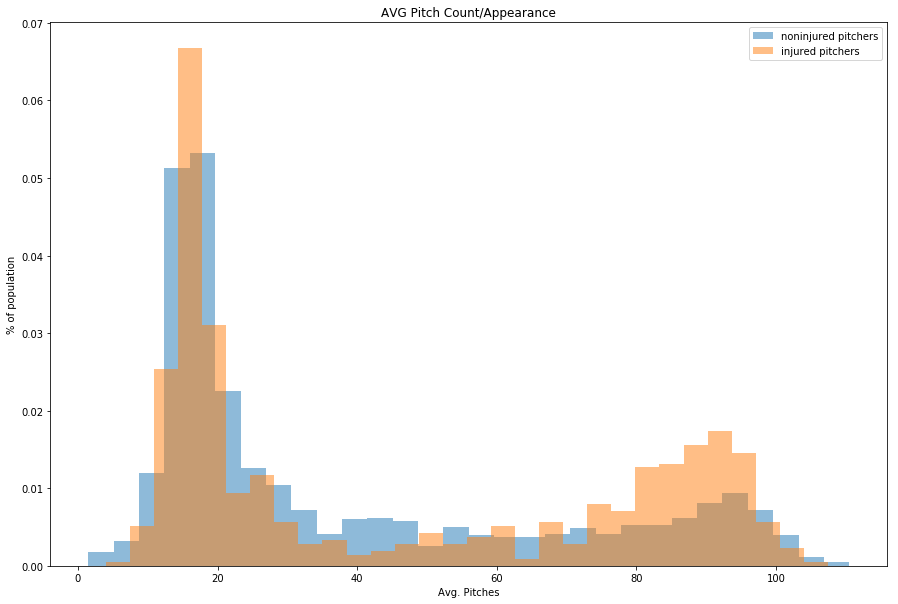

In [92]:
fig, ax = plt.subplots(figsize = (15,10))

plt.hist(avg_noinj['pit'], bins=30, alpha=.5, density=True)
plt.hist(avg_inj['pit'], bins=30, alpha=.5, density=True)
ax.legend(['noninjured pitchers', 'injured pitchers'])
plt.title('AVG Pitch Count/Appearance')
plt.xlabel('Avg. Pitches')
plt.ylabel('% of population')
plt.show()

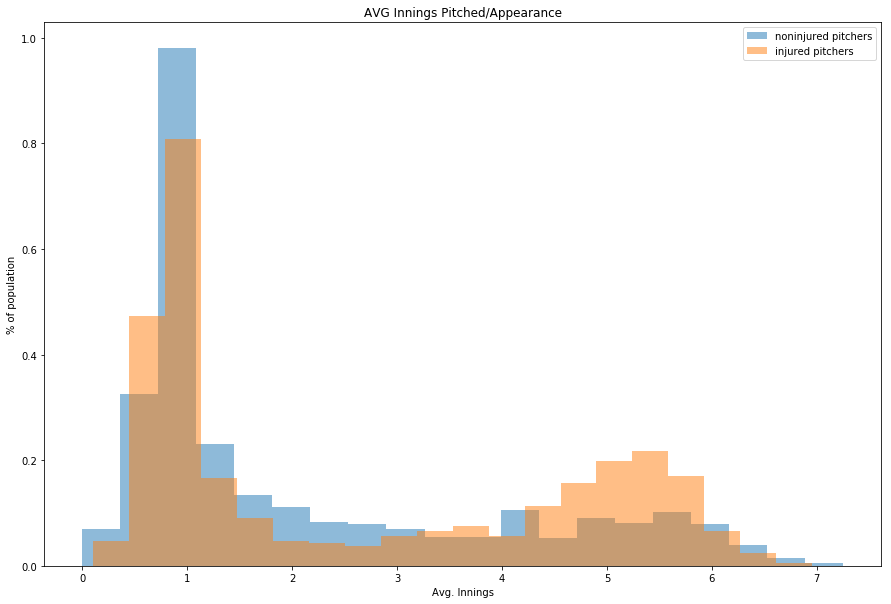

In [95]:
fig, ax = plt.subplots(figsize = (15,10))

plt.hist(avg_noinj['ip'], bins=20, alpha=.5, density=True)
plt.hist(avg_inj['ip'], bins=20, alpha=.5, density=True)
ax.legend(['noninjured pitchers', 'injured pitchers'])
plt.title('AVG Innings Pitched/Appearance')
plt.xlabel('Avg. Innings')
plt.ylabel('% of population')
plt.show()

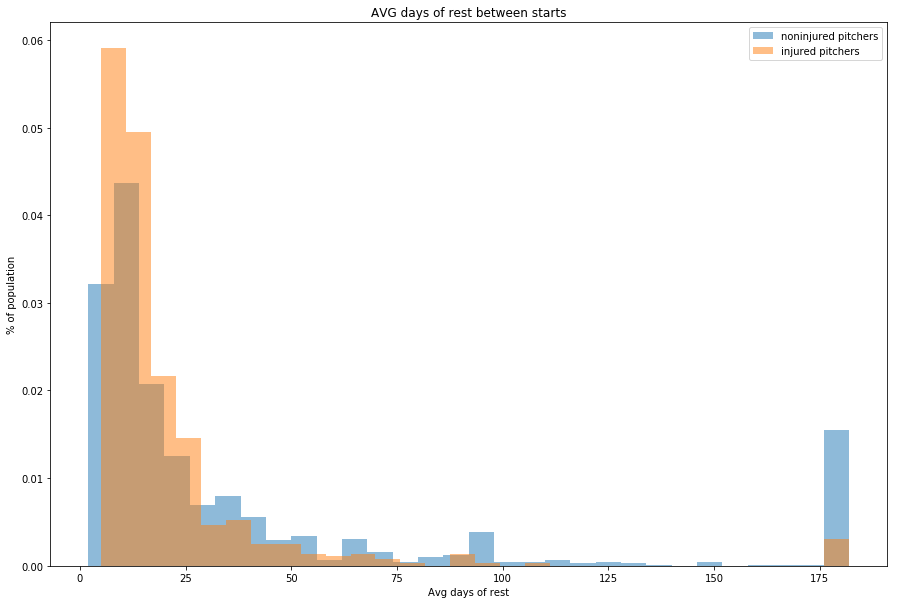

In [99]:
fig, ax = plt.subplots(figsize = (15,10))

plt.hist(avg_noinj['days_rest'], bins=30, alpha=.5, density=True)
plt.hist(avg_inj['days_rest'], bins=30, alpha=.5, density=True)
ax.legend(['noninjured pitchers', 'injured pitchers'])
plt.title('AVG days of rest between starts')
plt.xlabel('Avg days of rest')
plt.ylabel('% of population')
plt.show()